(lesson7.3)=
# Lesson October 18th

During today's lesson it's demonstrated how you to handle Temperature influences, stiffness discontinuities and support settlement for statically indeterminate structures.

## Demonstration temperature influences

Given is the following structure:

```{figure} intro_data/structure.svg
:align: center
```

To look at the temperature influences, it's easier to look at a statically determinate structure. We could look at the statically determinate structure with the unknown statical indeterminate force $B_\text{v}$ with the condition that the displacement at $\text{B}$ is $0$.

```{figure} intro_data/structure_deter.svg
:align: center
```

### Displacement due to temperature influence
Let's focus on the displacement due to the temperature influence first. As the top is warmer than the bottom of the beam, the top of the beam will extend with respect to the bottom side. For the statically determinate beam this will lead to a deflection downwards:

```{figure} intro_data/disp_deter_sun.svg
:align: center
```

The corresponding curvature $\kappa^\text{T}$ equals $\alpha \cfrac{\Delta T}{h} = 0.001 \text{ }\frac{1}{\text{m}}$ (◠), which is constant over the full beam:

```{figure} intro_data/curv_sun.svg
:align: center
```

The kinematically equivalent moment distribution has a couple at $\text{B}$ of which the value follows from $M = \kappa \cdot EI = 6 \text{ kNm}$ (↺)

```{figure} intro_data/moment.svg
:align: center
```

Using the forget-me-nots, this leads to a displacement at $\text{B}$ of $\cfrac{M \cdot L ^2}{2 EI} = 18 \text{ mm}$ (↓)

```{figure} intro_data/disp_deter_sun_2.svg
:align: center
```

### Displacement due to statically indeterminate support reaction

If we only consider the statically indeterminate support reaction:

```{figure} intro_data/structure_deter_Bv.svg
:align: center
```

The displacement can be calculated as $w_\text{B} = cfrac{B_\text{v}*L^3}{3EI} = \cfrac{3}{250}B_\text{v}$ (↑)

### Solve for statically indeterminate support reaction
As the total displacement at $\text{B}$ should be zero, $B_\text{v}$ can be calculated:

$$18 = \cfrac{3}{250}B_\text{v} $$

$$ B_\text{v} = 1.5 \text{ kN (↑)}$$

### Find moment distribution and displacements
The curvature due to the temperature influence doesn't cause internal stresses. However, the support reactions does. This gives the following moment distribution:

```{figure} intro_data/moment.svg
:align: center
```

The full displacement can be found by applying the forget-me-nots, leading to:

```{figure} intro_data/disp_total.svg
:align: center
```

1/1000

6

9/500

3/2

3*Bv/250

9

0.00450000000000000

0.00562500000000000

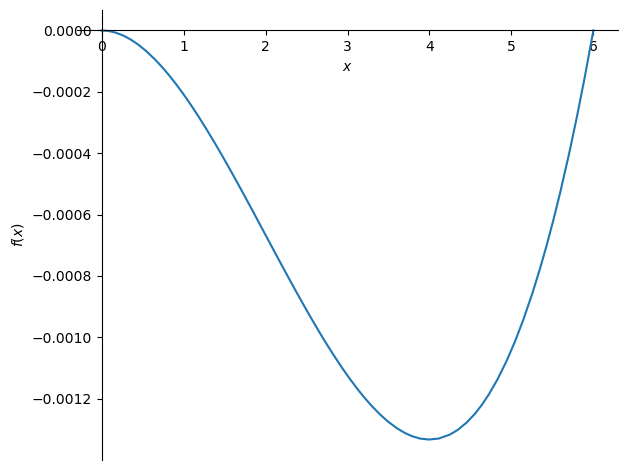

-0.00112500000000000

In [35]:
import sympy as sym

alpha, L, Delta_T, h = sym.symbols('alpha, L, Delta_T, h')
EI = sym.symbols('EI')

alpha = sym.nsimplify(10**-5)
Delta_T = 20
EI = 6000
L = 6
h = sym.nsimplify(0.2)

kappa = alpha * Delta_T / h
display(kappa)

M = kappa * EI
display(M)

w = M * L**2 / EI / 2
display(w)

F = w * 3 * EI / L **3 
display(F)

Bv = sym.symbols('Bv')
display( Bv * L **3 / EI / 3 )

M_A = F * L
display(M_A)

w_halfway = M * (L/2)**2 / EI / 2
display(w_halfway)

w_halfway_2 = F * L/2 * (L/2)**2 / EI / 2 + F * (L/2)**3 / 3 / EI
display(w_halfway_2)

x = sym.symbols('x')
w_halfway = M * (x)**2 / EI / 2 -  F * (L-x) * (x)**2 / EI / 2 - F * (x)**3 / 3 / EI

sym.plot(w_halfway, (x, 0, L))

display(w_halfway.subs(x, L/2))